# K-NN algorithm

Main idea of this algorithm is to find K nearest neighbors to the tested point. Distance between neighbors we can calculate using [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) or using other formulas which uses another metricies.

#### Dataset example

In this project I am using [iris dataset.](https://archive.ics.uci.edu/ml/datasets/iris)

Import all dependencies.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data from CSV file via filename.

In [48]:
def read_data(filename):
    return pd.read_csv(filename)

Plot all points on two axises. Uses three different colors for each class of iris flowers.

In [78]:
def plot_model(train, test):
    d = { 'Iris-virginica': 'red', 'Iris-versicolor': 'blue', 'Iris-setosa': 'green' }
    plt.scatter(np.array(train.iloc[:,0]), np.array(train.iloc[:,1]), c=np.array(train.iloc[:, 4].replace(d)), marker='x')
    plt.scatter(np.array(test.iloc[:,0]), np.array(test.iloc[:,1]), c='silver', marker='x')
    plt.show()

Measure distance between two points using Euclidean distance formula.  
Another function `get_neighbors` returns top K nearest points.

In [79]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1 - x2) ** 2)

def get_neighbors(x, train, k):
    return np.array(sorted([[u[4], euclidean_distance(x[:-1], u[:-1])] for u in np.array(train)], key=lambda x: x[1])[:k])

For each unit in dataset we find it's nearest neighbors and then find most frequent prediction.

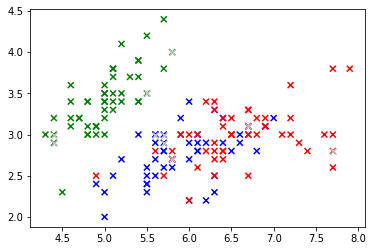

k = 1, Accuracy: 100.0%


In [80]:
K = 1

df = read_data('datasets/iris.csv')

train = df
tests = df.sample(10) 

err = 0
for test in np.array(tests):
    n = get_neighbors(test, train, k)
    v, c = np.unique(n[:, 0], return_counts=True)
    y = v[np.argmax(c)]
    err += 1 if y != test[4] else 0

plot_model(train, tests)
print(f'k = {k}, Accuracy: {(1 - err / tests.shape[0]) * 100}%')